![Pytorch](../../../pytorch_logo_2018.svg)

# Pytorch 基础篇（2）：线性回归（Linear Regression）

**[参考代码](https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py)**

In [9]:
# 包
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 超参数设置
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset 
# 玩具资料：小数据集
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 线性回归模型
model = nn.Linear(input_size, output_size)

# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [12]:
# 训练模型
for epoch in range(num_epochs):
    # 将Numpy数组转换为torch张量
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # 前向传播
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 反向传播和优化
    optimizer.zero_grad() # 注意每次循环都要注意清空梯度缓存
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 7.7737
Epoch [10/60], Loss: 3.2548
Epoch [15/60], Loss: 1.4241
Epoch [20/60], Loss: 0.6824
Epoch [25/60], Loss: 0.3820
Epoch [30/60], Loss: 0.2602
Epoch [35/60], Loss: 0.2109
Epoch [40/60], Loss: 0.1909
Epoch [45/60], Loss: 0.1828
Epoch [50/60], Loss: 0.1795
Epoch [55/60], Loss: 0.1781
Epoch [60/60], Loss: 0.1776


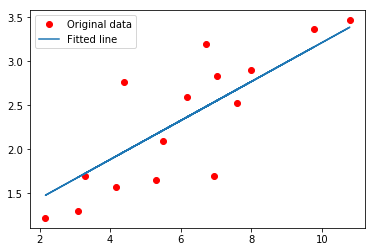

In [13]:
# 绘制图形
# torch.from_numpy(x_train)将X_train转换为Tensor
# model()根据输入和模型，得到输出
# detach().numpy()预测结结果转换为numpy数组
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [14]:
# 将模型的记录节点保存下来
torch.save(model.state_dict(), 'model.ckpt')